# Выполнил: Филоненко Никита Дмитриевич

-----

In [33]:
import pandas as pd
import numpy as np

# Реальные средние температуры (примерные данные) для городов по сезонам
seasonal_temperatures = {
    "New York": {"winter": 0, "spring": 10, "summer": 25, "autumn": 15},
    "London": {"winter": 5, "spring": 11, "summer": 18, "autumn": 12},
    "Paris": {"winter": 4, "spring": 12, "summer": 20, "autumn": 13},
    "Tokyo": {"winter": 6, "spring": 15, "summer": 27, "autumn": 18},
    "Moscow": {"winter": -10, "spring": 5, "summer": 18, "autumn": 8},
    "Sydney": {"winter": 12, "spring": 18, "summer": 25, "autumn": 20},
    "Berlin": {"winter": 0, "spring": 10, "summer": 20, "autumn": 11},
    "Beijing": {"winter": -2, "spring": 13, "summer": 27, "autumn": 16},
    "Rio de Janeiro": {"winter": 20, "spring": 25, "summer": 30, "autumn": 25},
    "Dubai": {"winter": 20, "spring": 30, "summer": 40, "autumn": 30},
    "Los Angeles": {"winter": 15, "spring": 18, "summer": 25, "autumn": 20},
    "Singapore": {"winter": 27, "spring": 28, "summer": 28, "autumn": 27},
    "Mumbai": {"winter": 25, "spring": 30, "summer": 35, "autumn": 30},
    "Cairo": {"winter": 15, "spring": 25, "summer": 35, "autumn": 25},
    "Mexico City": {"winter": 12, "spring": 18, "summer": 20, "autumn": 15},
}

# Сопоставление месяцев с сезонами
month_to_season = {12: "winter", 1: "winter", 2: "winter",
                   3: "spring", 4: "spring", 5: "spring",
                   6: "summer", 7: "summer", 8: "summer",
                   9: "autumn", 10: "autumn", 11: "autumn"}

- Импорт необходимых библиотек

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import asyncio
import aiohttp
from datetime import datetime
import time

In [35]:
data = pd.read_csv("../../data/temperature_data.csv")

data

,city,timestamp,temperature,season
0,New York,2010-01-01,4.245995,winter
1,New York,2010-01-02,5.771668,winter
2,New York,2010-01-03,6.595212,winter
3,New York,2010-01-04,4.542599,winter
4,New York,2010-01-05,2.713280,winter
...,...,...,...,...
54745,Mexico City,2019-12-25,9.254573,winter
54746,Mexico City,2019-12-26,13.840518,winter
54747,Mexico City,2019-12-27,1.107081,winter
54748,Mexico City,2019-12-28,16.073719,winter


- приведем timestamp к нужному dtype

In [36]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

print("Первые 5 строк данных:")
data.head()

Первые 5 строк данных:


,city,timestamp,temperature,season
0,New York,2010-01-01,4.245995,winter
1,New York,2010-01-02,5.771668,winter
2,New York,2010-01-03,6.595212,winter
3,New York,2010-01-04,4.542599,winter
4,New York,2010-01-05,2.713280,winter


- Основная информация о данных

In [37]:
print("\nИнформация о данных:")
data.info


Информация о данных:


<bound method DataFrame.info of               city  timestamp  temperature  season
0         New York 2010-01-01     4.245995  winter
1         New York 2010-01-02     5.771668  winter
2         New York 2010-01-03     6.595212  winter
3         New York 2010-01-04     4.542599  winter
4         New York 2010-01-05     2.713280  winter
...            ...        ...          ...     ...
54745  Mexico City 2019-12-25     9.254573  winter
54746  Mexico City 2019-12-26    13.840518  winter
54747  Mexico City 2019-12-27     1.107081  winter
54748  Mexico City 2019-12-28    16.073719  winter
54749  Mexico City 2019-12-29     7.129414  winter

[54750 rows x 4 columns]>

- Пропуски

In [38]:
data.isna().sum()

city           0
timestamp      0
temperature    0
season         0
dtype: int64

- Описательная статистика

In [39]:
print("\nОписательная статистика:")
data.describe()


Описательная статистика:


,timestamp,temperature
count,54750,54750.000000
mean,2014-12-30 12:00:00,18.284705
min,2010-01-01 00:00:00,-25.338249
25%,2012-07-01 00:00:00,11.286826
50%,2014-12-30 12:00:00,18.738909
75%,2017-06-30 00:00:00,26.057364
max,2019-12-29 00:00:00,53.966295
std,NaN,10.977932


- Анализ данных по городам

In [40]:
print("\nКоличество записей по городам:")
data['city'].value_counts()


Количество записей по городам:


city
New York          3650
London            3650
Paris             3650
Tokyo             3650
Moscow            3650
Sydney            3650
Berlin            3650
Beijing           3650
Rio de Janeiro    3650
Dubai             3650
Los Angeles       3650
Singapore         3650
Mumbai            3650
Cairo             3650
Mexico City       3650
Name: count, dtype: int64

- Визуализация распределения температур

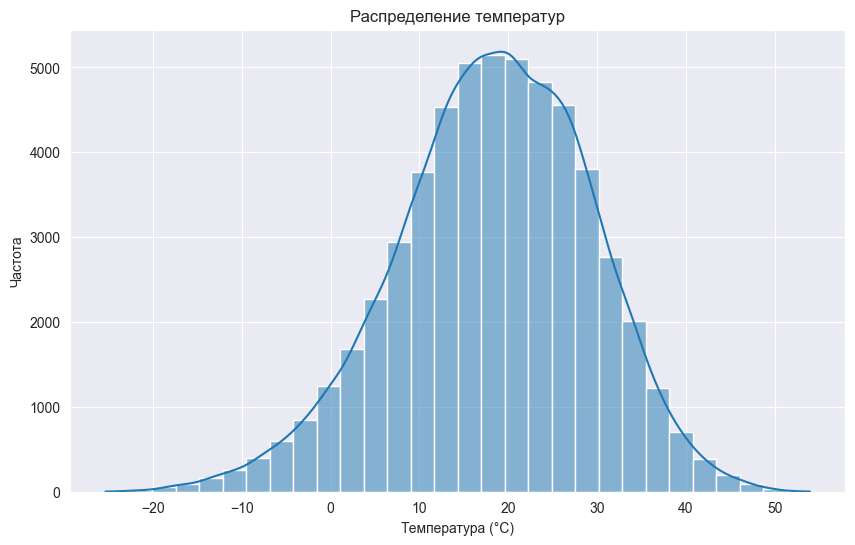

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=30, kde=True)
plt.title("Распределение температур")
plt.xlabel("Температура (°C)")
plt.ylabel("Частота")
plt.show()

- Анализ данных для конкретного города

In [42]:
city = "Moscow"
city_data = data[data['city'] == city].copy()
city_data.set_index('timestamp', inplace=True)

city_data

,city,temperature,season
timestamp,,,
2010-01-01,Moscow,-8.539255,winter
2010-01-02,Moscow,-12.705358,winter
2010-01-03,Moscow,-6.054447,winter
2010-01-04,Moscow,-11.780663,winter
2010-01-05,Moscow,-14.228279,winter
...,...,...,...
2019-12-25,Moscow,-22.446114,winter
2019-12-26,Moscow,-17.383570,winter
2019-12-27,Moscow,-10.042093,winter


- Визуализация временного ряда температуры

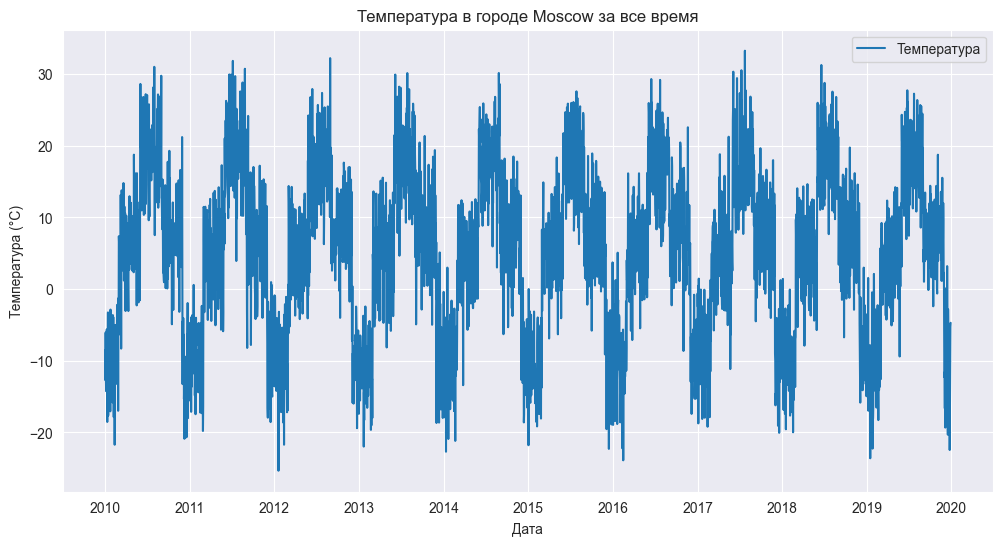

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(city_data.index, city_data['temperature'], label='Температура')
plt.title(f"Температура в городе {city} за все время")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.legend()
plt.show()

- Вычисление скользящего среднего и стандартного отклонения

In [44]:
city_data['rolling_mean'] = city_data['temperature'].rolling(window=30).mean()
city_data['rolling_std'] = city_data['temperature'].rolling(window=30).std()

In [45]:
city_data['rolling_mean']

timestamp
2010-01-01         NaN
2010-01-02         NaN
2010-01-03         NaN
2010-01-04         NaN
2010-01-05         NaN
                ...   
2019-12-25   -6.836565
2019-12-26   -7.653622
2019-12-27   -8.388929
2019-12-28   -8.882736
2019-12-29   -9.076610
Name: rolling_mean, Length: 3650, dtype: float64

In [46]:
city_data['rolling_std']

timestamp
2010-01-01         NaN
2010-01-02         NaN
2010-01-03         NaN
2010-01-04         NaN
2010-01-05         NaN
                ...   
2019-12-25    8.552973
2019-12-26    8.341103
2019-12-27    7.474536
2019-12-28    6.696546
2019-12-29    6.477739
Name: rolling_std, Length: 3650, dtype: float64

- Визуализация скользящего среднего и стандартного отклонения

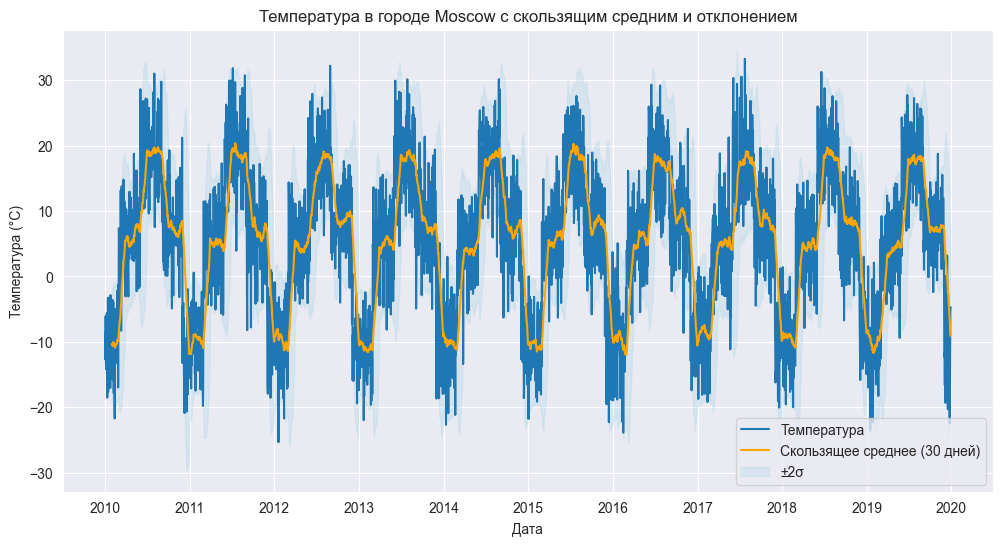

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(city_data.index, city_data['temperature'], label='Температура')
plt.plot(city_data.index, city_data['rolling_mean'], label='Скользящее среднее (30 дней)', color='orange')
plt.fill_between(city_data.index, 
                 city_data['rolling_mean'] - 2 * city_data['rolling_std'], 
                 city_data['rolling_mean'] + 2 * city_data['rolling_std'], 
                 color='lightblue', alpha=0.3, label='±2σ')
plt.title(f"Температура в городе {city} с скользящим средним и отклонением")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.legend()
plt.show()

- Определение аномалий

In [48]:
city_data['anomaly'] = np.where(
    (city_data['temperature'] > city_data['rolling_mean'] + 2 * city_data['rolling_std']) |
    (city_data['temperature'] < city_data['rolling_mean'] - 2 * city_data['rolling_std']),
    1, 0
)

In [49]:
city_data['anomaly']

timestamp
2010-01-01    0
2010-01-02    0
2010-01-03    0
2010-01-04    0
2010-01-05    0
             ..
2019-12-25    0
2019-12-26    0
2019-12-27    0
2019-12-28    0
2019-12-29    0
Name: anomaly, Length: 3650, dtype: int64

- Визуализация аномалий

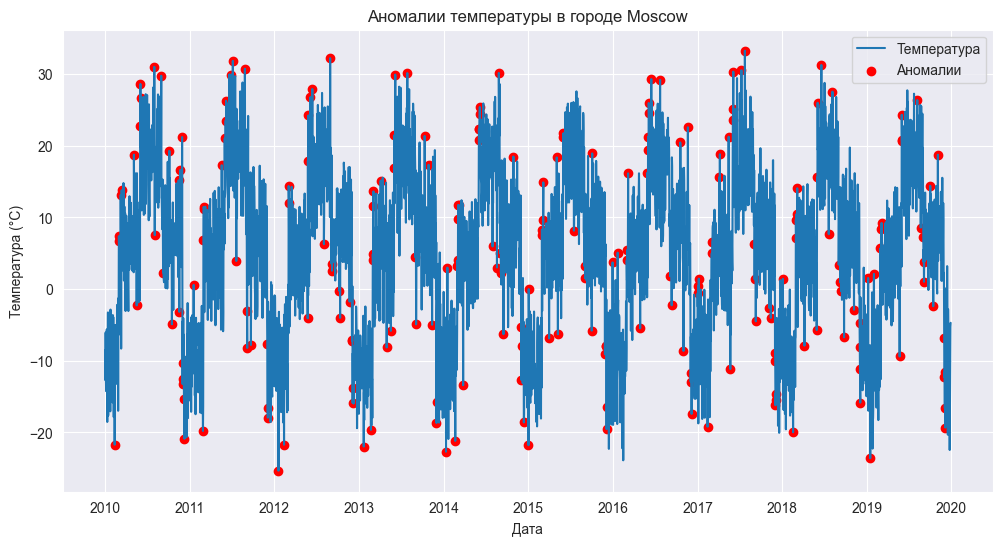

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(city_data.index, city_data['temperature'], label='Температура')
plt.scatter(city_data.index[city_data['anomaly'] == 1], 
            city_data['temperature'][city_data['anomaly'] == 1], 
            color='red', label='Аномалии')
plt.title(f"Аномалии температуры в городе {city}")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.legend()
plt.show()

- Анализ по сезонам

In [51]:
seasonal_data = city_data.groupby('season')['temperature'].agg(['mean', 'std'])
print("\nСредняя температура и стандартное отклонение по сезонам:")
print(seasonal_data)


Средняя температура и стандартное отклонение по сезонам:
             mean       std
season                     
autumn   7.800390  5.272902
spring   4.950740  5.122344
summer  18.244892  5.183075
winter  -9.913263  5.066993


- Визуализация сезонных профилей

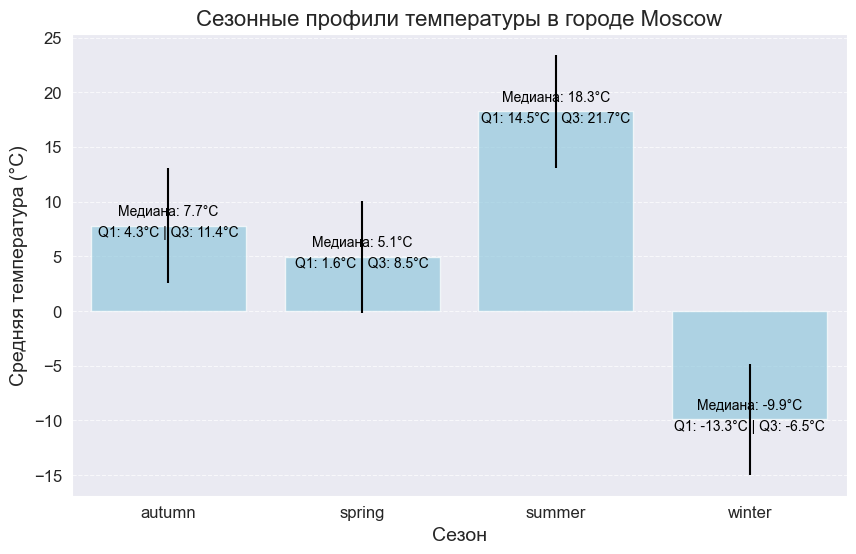

In [52]:
seasonal_data = city_data.groupby("season")["temperature"].agg(
    mean="mean",
    std="std",
    median="median",
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    count="size"
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_data["season"], y=seasonal_data["mean"], yerr=seasonal_data["std"], color='skyblue', alpha=0.7)
plt.title(f"Сезонные профили температуры в городе {city}", fontsize=16)
plt.xlabel("Сезон", fontsize=14)
plt.ylabel("Средняя температура (°C)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, row in seasonal_data.iterrows():
    plt.text(index, row['mean'] + 1, f"Медиана: {row['median']:.1f}°C", ha='center', fontsize=10, color='black')
    plt.text(index, row['mean'] - 1, f"Q1: {row['q1']:.1f}°C | Q3: {row['q3']:.1f}°C", ha='center', fontsize=10, color='black')

plt.show()

- Подключение к OpenWeatherMap API

In [53]:
api_key = "..."
city = "Moscow"

- Синхронный запрос текущей температуры

In [54]:
def get_current_temperature(api_key, city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()['main']['temp']
    else:
        return None

current_temp = get_current_temperature(api_key, city)
print(f"\nТекущая температура в {city}: {current_temp}°C")


Текущая температура в Moscow: -3.66°C


- Асинхронная функция для получения текущей температуры

In [61]:
async def async_get_current_temperature(api_key, city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                data = await response.json()
                return data['main']['temp']
            else:
                return None

In [62]:
cities = ["Moscow", "Berlin", "Paris", "Tokyo"]

In [63]:
# Асинхронная функция для тестирования
async def async_test():
    tasks = [async_get_current_temperature(api_key, city) for city in cities]
    results = await asyncio.gather(*tasks)
    return results

start_time = time.time()
results = await async_test()
async_time = time.time() - start_time

print(f"Время выполнения асинхронных запросов: {async_time:.2f} секунд")
print("Результаты запросов:")
for city, temp in zip(cities, results):
    print(f"{city}: {temp}°C")

Время выполнения асинхронных запросов: 0.25 секунд
Результаты запросов:
Moscow: -3.66°C
Berlin: 8.95°C
Paris: 6.17°C
Tokyo: 8.09°C


- Исследование синхронных и асинхронных запросов

In [64]:
cities = ["Moscow", "Berlin", "Paris", "Tokyo"]

In [65]:
import requests

def get_current_temperature(api_key, city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()['main']['temp']
    else:
        return None

# Синхронный тест
start_time = time.time()
sync_results = [get_current_temperature(api_key, city) for city in cities]
sync_time = time.time() - start_time


print(f"\nВремя выполнения синхронных запросов: {sync_time:.2f} секунд")
print("Результаты запросов:")
for city, temp in zip(cities, sync_results):
    print(f"{city}: {temp}°C")


print(f"\nСинхронные запросы заняли {sync_time:.2f} секунд, асинхронные — {async_time:.2f} секунд.")
if async_time < sync_time:
    print("Асинхронные запросы быстрее.")
else:
    print("Синхронные запросы быстрее.")


Время выполнения синхронных запросов: 0.92 секунд
Результаты запросов:
Moscow: -3.66°C
Berlin: 8.74°C
Paris: 6.17°C
Tokyo: 8.09°C

Синхронные запросы заняли 0.92 секунд, асинхронные — 0.25 секунд.
Асинхронные запросы быстрее.
